In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from scipy.signal import argrelextrema

In [10]:
%matplotlib inline
import pylab as pl

In [11]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [12]:
def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [13]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [14]:
df=pd.read_csv("./sensor.csv")
df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [15]:
df["Timestamp"] = pd.to_datetime(df["timestamp"])
df_gb = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
df_gb.reset_index(inplace=True)
df_gb

,Timestamp,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01,719.5,2.454139,47.318882,52.567363,45.273315,634.166035,74.516172,13.348212,16.161459,...,32.626770,40.682243,50.859817,51.617557,45.070015,39.786884,197.029723,92.171022,241.056817,217.054678
1,2018-04-02,2159.5,2.429367,48.595226,52.199163,44.094026,635.990899,77.960694,13.340421,16.161022,...,33.555409,43.272566,46.112437,66.206316,53.731031,40.172284,203.099479,73.322964,243.407801,205.087368
2,2018-04-03,3599.5,2.435093,49.266702,52.060062,44.336599,640.359938,76.903797,13.452223,16.301238,...,34.660190,42.534900,44.204121,47.936961,42.168222,40.946113,157.432927,64.259821,201.386879,201.646492
3,2018-04-04,5039.5,2.452493,50.429565,51.959000,45.096479,640.173640,75.858830,13.512238,16.511281,...,34.545354,43.123188,42.631220,45.638222,43.511485,40.603311,154.669415,67.019917,213.312395,204.283411
4,2018-04-05,6479.5,2.454101,49.353086,52.096564,43.982806,636.350491,76.824878,13.425036,16.227121,...,33.312353,42.356406,45.254630,46.999582,44.231047,39.532897,213.241463,82.239020,240.274159,234.841377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2018-08-27,213839.5,2.397325,49.077267,50.995007,44.272972,629.476285,75.191813,14.732405,16.555016,...,31.871201,44.036998,45.100107,45.915163,54.741151,41.868824,265.343482,75.546955,NaN,215.756213
149,2018-08-28,215279.5,2.484509,48.750963,50.825465,44.272459,631.976319,72.276470,15.060769,16.604658,...,31.891636,43.499707,46.501254,60.823367,61.883520,42.537334,282.142366,72.129388,NaN,217.672568
150,2018-08-29,216719.5,2.462678,48.388881,51.325923,44.761404,629.564036,76.858206,15.095380,16.576662,...,32.484627,43.391200,51.786748,65.166860,61.894571,42.187888,313.535835,87.895648,NaN,217.231304
151,2018-08-30,218159.5,2.440611,49.141889,51.904927,45.522188,628.580324,73.744396,15.075095,16.537262,...,33.278354,42.855538,57.698969,55.559976,56.916112,45.339225,280.001366,95.470236,NaN,221.649949


In [16]:
len(df)/len(df_gb)

1440.0

<function matplotlib.pyplot.show(close=None, block=None)>

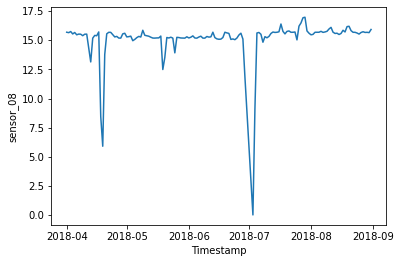

In [29]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

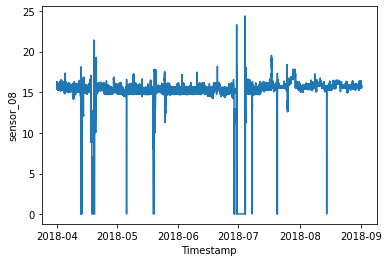

In [18]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

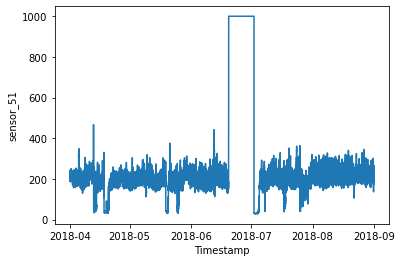

In [213]:
sns.lineplot(x="Timestamp", y="sensor_51", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

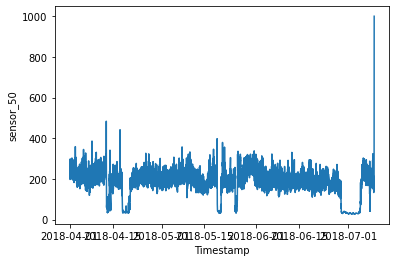

In [214]:
sns.lineplot(x="Timestamp", y="sensor_50", data=df)
plt.show

In [215]:
# lissage lowess

In [216]:
# sensor_01

In [217]:
# len(df_gb)

In [219]:
# df_gb

In [220]:
x=pd.to_numeric(df_gb.index)
y=pd.to_numeric(df_gb.sensor_01)

In [221]:
# x

In [222]:
# y

In [223]:
result = lowess(y, x, frac=0.05, it=3, delta=0.0)

In [224]:
# result

In [225]:
ar2 =[]
for i in range(len(result[0])):
    b =[]
    for j in range(len(result)):
        b.append(result[j][i])
    ar2.append(b)
# print(ar2)

<function matplotlib.pyplot.show(close=None, block=None)>

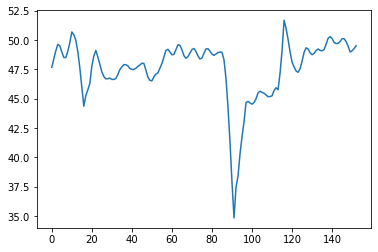

In [226]:
sns.lineplot(x=ar2[0], y=ar2[1])
plt.show

In [227]:
len(ar2[1])

153

In [228]:
# sensor_08

<function matplotlib.pyplot.show(close=None, block=None)>

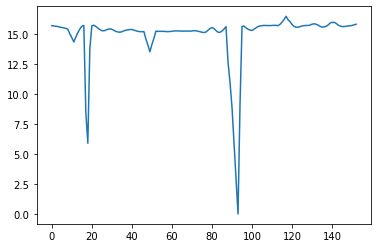

In [242]:
x=pd.to_numeric(df_gb.index)
y=pd.to_numeric(df_gb.sensor_08)
result = lowess(y, x, frac=0.05, it=3, delta=0.0)
ar2 =[]
for i in range(len(result[0])):
    b =[]
    for j in range(len(result)):
        b.append(result[j][i])
    ar2.append(b)
sns.lineplot(x=ar2[0], y=ar2[1])
plt.show

In [ ]:
# sensor_51

In [30]:
df_gb_H = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="H")).mean()
df_gb_H.reset_index(inplace=True)
# df_gb_H

In [31]:
df1 = df_gb_H.set_index("Timestamp")
df1.loc["2018-08"].head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,175709.5,2.453834,46.692708,51.064088,44.636139,638.389365,74.892339,14.497370,16.216603,15.666353,...,34.153643,51.115449,43.074846,38.821372,53.351658,49.406829,154.041272,52.228009,NaN,231.491122
2018-08-01 01:00:00,175769.5,2.453834,47.018227,51.090853,44.697626,636.514895,66.888325,14.439381,16.533083,15.930628,...,33.072915,49.257809,44.010416,61.998457,71.696565,46.479553,266.010807,70.081018,NaN,244.396212
2018-08-01 02:00:00,175829.5,2.454162,47.445022,50.773291,44.756218,637.010026,61.186508,14.614558,16.453631,15.735557,...,33.359373,45.134545,45.732060,41.931594,52.666860,47.694831,253.375770,69.391396,NaN,234.635415
2018-08-01 03:00:00,175889.5,2.454064,47.873986,50.074507,44.669414,637.332128,66.006200,14.604913,16.004170,15.674914,...,33.016490,44.266489,48.644869,38.213734,45.346568,39.385609,198.297645,60.455247,NaN,195.056905
2018-08-01 04:00:00,175949.5,2.454080,48.185763,49.834345,44.534142,636.939761,64.555687,14.616366,15.928216,15.673708,...,33.203122,43.480899,48.268711,44.309414,50.733025,39.631558,295.027967,58.887924,NaN,192.751732


In [33]:
df11 = df1.loc["2018-08"]
trainData = df11[:]["sensor_51"]
trainData

Timestamp
2018-08-01 00:00:00    231.491122
2018-08-01 01:00:00    244.396212
2018-08-01 02:00:00    234.635415
2018-08-01 03:00:00    195.056905
2018-08-01 04:00:00    192.751732
                          ...    
2018-08-31 19:00:00    196.923230
2018-08-31 20:00:00    243.214698
2018-08-31 21:00:00    229.113615
2018-08-31 22:00:00    203.496340
2018-08-31 23:00:00    227.199068
Name: sensor_51, Length: 744, dtype: float64

In [34]:
trainData.reset_index()

,Timestamp,sensor_51
0,2018-08-01 00:00:00,231.491122
1,2018-08-01 01:00:00,244.396212
2,2018-08-01 02:00:00,234.635415
3,2018-08-01 03:00:00,195.056905
4,2018-08-01 04:00:00,192.751732
...,...,...
739,2018-08-31 19:00:00,196.923230
740,2018-08-31 20:00:00,243.214698
741,2018-08-31 21:00:00,229.113615
742,2018-08-31 22:00:00,203.496340


<function matplotlib.pyplot.show(close=None, block=None)>

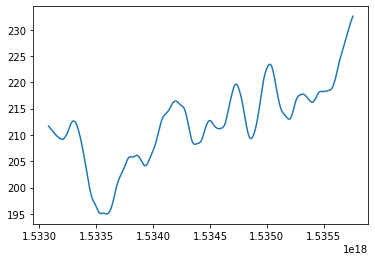

In [35]:
x=pd.to_numeric(trainData.index)
y=pd.to_numeric(trainData)
result = lowess(y, x, frac=0.1, it=3, delta=0.0)
ar2 =[]
for i in range(len(result[0])):
    b =[]
    for j in range(len(result)):
        b.append(result[j][i])
    ar2.append(b)
sns.lineplot(x=ar2[0], y=ar2[1])
plt.show

In [ ]:
y[y.isnull()] = 0
ya = np.array(y.values.tolist())
maxs = list(argrelextrema(ya, np.greater)[0])
mins = list(argrelextrema(ya, np.less)[0])
extreme = maxs+mins
extreme_single = list({d:None for d in extreme}.keys())

In [14]:
result = lowess(y, x, frac=0.05, it=3, delta=0.0)
ar2 =[]
for i in range(len(result[0])):
    b =[]
    for j in range(len(result)):
        b.append(result[j][i])
    ar2.append(b)

In [17]:
len(result[0])

2

In [15]:
px, py = segments_fit(np.array(ar2[0]), np.array(ar2[1]), len(extreme_single))
pl.plot(np.array(ar2[0]), np.array(ar2[1]), ".")
pl.plot(px, py, "-or")

KeyboardInterrupt: 

In [247]:
# ar2

In [36]:
y[y.isnull()] = 0

In [43]:
type(y)

pandas.core.series.Series

In [68]:
ya = np.array(y.values.tolist())

In [84]:
maxs = list(argrelextrema(ya, np.greater)[0])

In [85]:
mins = list(argrelextrema(ya, np.less)[0])

In [87]:
extreme = maxs+mins
# extreme

In [89]:
extreme_single = list({d:None for d in extreme}.keys())
# extreme_single

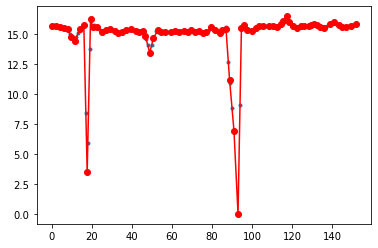

In [106]:
px, py = segments_fit(np.array(ar2[0]), np.array(ar2[1]), len(extreme_single))
pl.plot(np.array(ar2[0]), np.array(ar2[1]), ".")
pl.plot(px, py, "-or")

In [122]:
lpx = list(px)
lpy = list(py)

In [127]:
lstate=[]
for i in range(len(lpx)-1):
    lstate.append(np.arccos((lpy[i+1]-lpy[i])/((lpx[i+1]-lpx[i])*10)))
# lstate

In [118]:
max(lstate)

2.271326276722666

In [119]:
min(lstate)

0.8159823842251508

In [1]:
import math
quali_state = []
for i in lstate : 
    if 0<i<math.pi/6:
        quali_state.append(0)
    elif math.pi/6<i<2*math.pi/6:
        quali_state.append(1)
    elif 2*math.pi/6<i<3*math.pi/6:
        quali_state.append(2)
    elif 3*math.pi/6<i<4*math.pi/6:
        quali_state.append(3)
    elif 4*math.pi/6<i<5*math.pi/6:
        quali_state.append(4)
    elif 5*math.pi/6<i<6*math.pi/6:
        quali_state.append(5)
    else:
        quali_state.append(6)

NameError: name 'lstate' is not defined

In [157]:
# np.arccos(-1)

In [158]:
ar = np.array([lstate, quali_state])
# ar

In [174]:
df_state = pd.DataFrame({'val_ongle': pd.Series(lstate), 'state': pd.Series(quali_state)})
df_state

,val_ongle,state
0,1.565886,3
1,1.569038,3
2,1.568659,3
3,1.578714,4
4,1.582990,4
...,...,...
73,1.610457,4
74,1.576305,4
75,1.573828,4
76,1.574830,4


In [183]:
tab_proba = []
for i in range(7):
    tab_proba.append([])
for i in range(7):    
    for j in range(7):
        tab_proba[i].append(0)
# tab_proba

In [184]:
for i in range(len(df_state["state"])-1):
    a=df_state["state"][i]
    b=df_state["state"][i+1]
    tab_proba[a][b]=tab_proba[a][b]+1
tab_proba

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 18, 19, 0, 0],
 [0, 0, 1, 18, 17, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [139]:
# Table of distance

In [140]:
tab_dis = []
for i in range(len(ar2[0])):
    tab_dis.append([])
for i in range(len(ar2[0])):    
    for j in range(len(ar2[1])):
        tab_dis[i].append([])
# tab_dis

In [141]:
for i in range(len(ar2[0])):
    for j in range(len(ar2[1])):
        tab_dis[i][j] = abs(ar2[1][i] - ar2[1][j] )

In [22]:
# tab_dis

In [23]:
df_dist = pd.DataFrame(tab_dis)

In [24]:
# df_dist

In [25]:
df_dist.shape

(151, 151)

In [26]:
def add_labels(x_list, y_list, labels):
    for x,y,label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

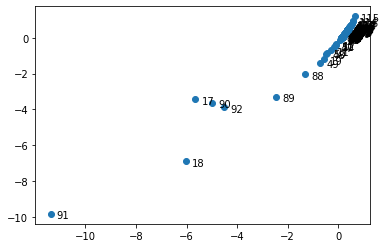

In [27]:
from sklearn.manifold import MDS
aftd = MDS(n_components=2, dissimilarity='precomputed')
dist = aftd.fit_transform(df_dist)
plt.scatter(*dist.T)
add_labels(dist[:, 0], dist[:, 1], df_dist.index)
plt.show()

In [ ]:
# AFTD

In [ ]:
# clustering 5 groupes 

In [28]:
from sklearn.cluster import AgglomerativeClustering

C:\Users\corri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


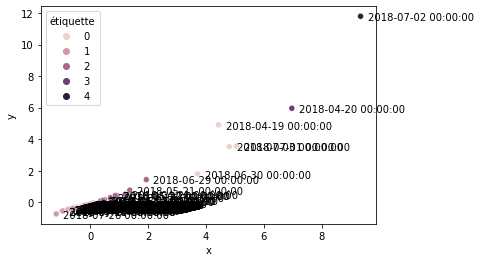

In [29]:
model = AgglomerativeClustering(affinity="precomputed", linkage="complete", n_clusters=5).fit(df_dist)
labels = model.labels_
aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(df_dist)
df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot("x", "y", hue="étiquette", data=df)
add_labels(dist[:, 0], dist[:, 1], df_gb["Timestamp"][1:-1])
plt.show()

In [30]:
len(df_gb["Timestamp"])

153

In [31]:
len(ar2[1])

151

In [32]:
len(labels)

151

<function matplotlib.pyplot.show(close=None, block=None)>

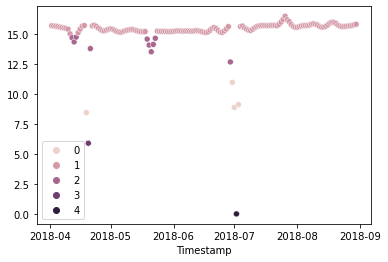

In [33]:
sns.scatterplot(x= df_gb["Timestamp"][1:-1], y=ar2[1],hue=labels)
plt.show

In [ ]:
# AFTD

In [ ]:
# clustering 3 groupes 

<function matplotlib.pyplot.show(close=None, block=None)>

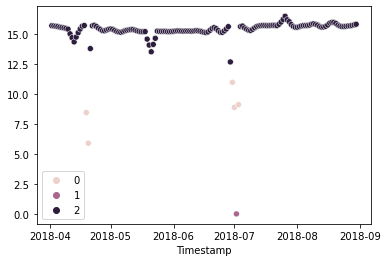

In [34]:
model = AgglomerativeClustering(affinity="precomputed", linkage="complete", n_clusters=3).fit(df_dist)
labels = model.labels_
aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(df_dist)
df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot(x= df_gb["Timestamp"][1:-1], y=ar2[1],hue=labels)
plt.show

NameError: name 'np' is not defined

range(0, 10)

In [ ]:
# K-Means 

In [ ]:
#clustering 3 groupes

In [35]:
from sklearn.cluster import KMeans
from src2.utils import *

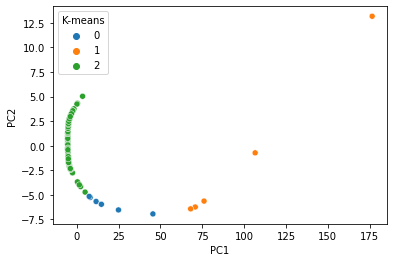

In [36]:
cls = KMeans(n_clusters=3, init="random")
cls.fit(df_dist)
labels_k = pd.Series(cls.labels_, name="K-means")
scatterplot_pca(data=df_dist, hue=labels_k)
plt.show()

In [37]:
# len(labels_k)

In [38]:
# type(labels_k)

In [39]:
# type(labels)

In [40]:
list_labels_k = labels_k.to_list()
# len(list_labels_k)

In [41]:
# len(df_gb["Timestamp"][1:-1])

In [42]:
# len(ar2[1])

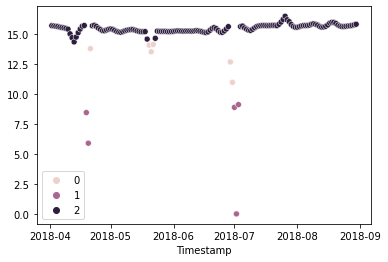

In [43]:
sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar2[1], hue=list_labels_k)
plt.show()